In [2]:
# Importing and reading csv files
import pandas as pd
import numpy as np
df_jan = pd.read_csv('../21JAN.csv')
df_feb = pd.read_csv('../21FEB.csv')
df_mar = pd.read_csv('../21MAR.csv')
df_apr = pd.read_csv('../21APR.csv')
df_may = pd.read_csv('../21MAY.csv')
df_jun = pd.read_csv('../21JUN.csv')
df_jul = pd.read_csv('../21JUL.csv')
df_aug = pd.read_csv('../21AUG.csv')
df_sep = pd.read_csv('../21SEP.csv')
df_oct = pd.read_csv('../21OCT.csv')
df_nov = pd.read_csv('../21NOV.csv')
df_dec = pd.read_csv('../21DEC.csv')

In [46]:
#cus_age = age of the customer (만 나이)
#act_trd_dit_cd: 1 = Deposit 2 = Withdrawal
#sum_trd_amt = summation of all the transactions
#count_trd_cnt = number of transactions

In [47]:
#Gen-Z = 0~24
#Gen-M = 25~39
#Gen-X = 40~54
#Gen-B = 55~80
#We will not take 80+ yrs old in account

df_jan.head()

,cus_age,act_trd_dit_cd,sum_trd_amt,count_trd_cnt
0,0,1,1.435413e+09,1033
1,0,2,1.068980e+08,104
2,1,1,2.383462e+09,1611
3,1,2,6.280080e+08,203
4,2,1,1.479552e+09,1555


In [69]:
#Function to take out 80+ yrs old
def clean_eighty(df):
    df = df[df['cus_age'] < 81]
    return df

df_jan = clean_eighty(df_jan)
df_feb = clean_eighty(df_feb)
df_mar = clean_eighty(df_mar)
df_apr = clean_eighty(df_apr)
df_may = clean_eighty(df_may)
df_jun = clean_eighty(df_jun)
df_jul = clean_eighty(df_jul)
df_aug = clean_eighty(df_aug)
df_sep = clean_eighty(df_sep)
df_oct = clean_eighty(df_oct)
df_nov = clean_eighty(df_nov)
df_dec = clean_eighty(df_dec)
r = np.array([0, 24, 39, 54, 80])

def get_sum(df):    
    return df.groupby(pd.cut(df['cus_age'], r)).sum()

# Helper Function
# Gets the average sum_trd_amt
def find_sum(df):
    grouped_age = pd.cut(df['cus_age'], r)
    grouped_graph = df.groupby(grouped_age).sum()

    lst = []
    for i in range(4):
        val = ((grouped_graph['sum_trd_amt'].iloc[i])/(grouped_graph['count_trd_cnt'].iloc[i]))
        lst.append(val)
        
    grouped_graph['sum_trd_amt'] = lst
    return grouped_graph.drop(columns= ['cus_age', 'act_trd_dit_cd', 'count_trd_cnt'])

# Helper function to add all elements in sum_trd_amt into a list
def add_all(df):
    gen_z = 0
    gen_m = 0
    gen_x = 0
    gen_b = 0
    lst = []
    
    gen_z += find_sum(df)['sum_trd_amt'].iloc[0]
    gen_m += find_sum(df)['sum_trd_amt'].iloc[1]
    gen_x += find_sum(df)['sum_trd_amt'].iloc[2]
    gen_b += find_sum(df)['sum_trd_amt'].iloc[3]
    lst.append(gen_z)
    lst.append(gen_m)
    lst.append(gen_x)
    lst.append(gen_b)
    return lst


In [85]:
# Adding jan to dec using the helper functions
sum_list_first = [a+b+c+d+e+f for a,b,c,d,e,f in zip(add_all(df_jan), add_all(df_feb),add_all(df_mar), add_all(df_apr), add_all(df_may), add_all(df_jun))]
sum_list_last = [a+b+c+d+e+f for a,b,c,d,e,f in zip(add_all(df_jul), add_all(df_aug), add_all(df_sep), add_all(df_oct), add_all(df_nov), add_all(df_dec))]
sum_lists = [a+b for a,b in zip(sum_list_first, sum_list_last)]

# Rounding list
ans = []
for i in sum_lists:
    i = i.round()
    ans.append(int(i))

#Table for sum of all transactions for each gen
sum_of_trans = get_sum(df_jan).drop(columns=['cus_age', 'act_trd_dit_cd', 'count_trd_cnt'])
sum_of_trans['sum_trd_amt'] = ans
sum_of_trans

,sum_trd_amt
cus_age,
"(0, 24]",11420035
"(24, 39]",38428842
"(39, 54]",78884782
"(54, 80]",209602109


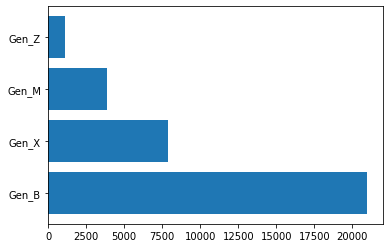

In [3]:
#Graphing the table
#X축 = 만원 기준
#세대별 평균 입출금거래액 총합 그래프
import matplotlib.pyplot as plt

df = pd.DataFrame({'A':['Gen_Z'] * 1142 + ['Gen_M'] * 3842 + ['Gen_X'] * 7888 + ['Gen_B'] * 20960})
counts = df["A"].value_counts()
plt.barh(counts.index, counts)
plt.show()